<a href="https://colab.research.google.com/github/LolBoi14/Computer_vision/blob/main/Banks_failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'Failed_bank_list'
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfailures = pd.read_csv(filename,sep=",",encoding='latin-1')

KeyboardInterrupt: 

In [ ]:
dfailures.head()

In [ ]:
# Ouverture du fichier 'Etats_US'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dstates = pd.read_excel(filename)

In [ ]:
dfailures.isna().sum()

In [ ]:
print(dfailures.duplicated().sum())

In [ ]:
dfailures.info()

In [ ]:
dfailures.columns = dfailures.columns.str.strip()

In [ ]:
dfailures['Closing Date'] = pd.to_datetime(dfailures['Closing Date'])

In [ ]:
dstates.head()

In [ ]:
dfailures = dfailures.rename(columns={'State':'Code'})

In [ ]:
dfailures = dfailures.merge(dstates,on='Code',how='left')

In [ ]:
dfailures.head()

In [ ]:
dfailures.value_counts()

In [ ]:
dfailures_no_acquirer = dfailures.loc[dfailures['Acquiring Institution']=="No Acquirer"]
dfailures_no_acquirer.head()
len(dfailures_no_acquirer)/len(dfailures)*100

In [ ]:
dfailures = dfailures.sort_values(by='Closing Date')

In [ ]:
dfailures.tail()

In [ ]:

dfailures.head()


In [ ]:
dfailures['Month'] = dfailures['Closing Date'].dt.month
dfailures['Year'] = dfailures['Closing Date'].dt.year

In [ ]:
failures_month = dfailures['Bank Name'].groupby(dfailures['Month']).count()
failures_year  = dfailures['Bank Name'].groupby(dfailures['Year']).count()
failures_states  = dfailures['Bank Name'].groupby(dfailures['Etat']).count().sort_values(ascending=False)
failures_states


In [ ]:
failures_year

In [ ]:
failures_states

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))


failures_month.plot(kind='line',marker='o')
plt.title('Evolution du nombre de faillites par mois')
plt.show()

In [ ]:
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(failures_year,marker='o')
ax.set_title('Evolution du nombre de faillites par année')
plt.show()

In [ ]:
fix,ax = plt.subplots(figsize=(25,5))
ax.bar(failures_states.index, failures_states.values)
ax.set_title('Distribution du nombre de faillites par état')
ax.set_xlabel('Etats américains')
ax.set_ylabel('Nombre de faillites bancaires')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
dfailures.to_excel("US_banks_failures.xlsx", index = False)
files.download('US_banks_failures.xlsx')

II - NETTOYAGE RETRAITEMENT ET FUSION DE FICHIERS BANKFOCUS ET FAILLITES

II.a Nettoyage

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'Aggregated.xslx'
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# dfaggregated = pd.read_excel(filename)

In [ ]:
dfaggregated.head(2)
# dfaggregated['Country ISO code'] = dfaggregated['Country ISO code'].astype(str)
# dfaggregated['Country ISO code'] = dfaggregated['Country ISO code'].replace({"NA":"NAM"})
dfaggregated.loc[dfaggregated['Country ISO code']=='NAM'].head(2)

In [ ]:
# Nettoyage - suppression des colonnes 'Moddy's', 'GUO'

cols_to_drop = [col for col in dfaggregated.columns if col.startswith(("Moody's", "GUO"))]
dfaggregated.drop(columns=cols_to_drop, inplace=True)

In [ ]:

col = [col for col in dfaggregated.columns if col.startswith("Total assets")]
dfaggregated['Total assets\nm USD Last avail. yr'].describe()
dfaggregated[col].describe()


In [ ]:
dfaggregated.head(2)
dfaggregated['BvD bank index number'] = dfaggregated['BvD bank index number'].astype('str')
print(dfaggregated['BvD bank index number'].dtype)

In [ ]:
def categorize_bank_size(total_assets):
    if total_assets < 500:
        return "Very_Small"
    elif total_assets < 2000:
        return "Small"
    elif total_assets < 10000:
        return "Medium"
    else:
        return "Large"

In [ ]:
# Variables absolues (montants en millions)
absolute_vars = [
    "Net interest income (expense)\nm LCU Year - 2",
    "Net interest income (expense)\nm LCU Year - 1",
    "Net interest income (expense)\nm LCU Last avail. yr",
    "Net interest income (expense)\nm USD Last avail. yr",
    "Net fee & commission income (expense)\nm LCU Year - 2",
    "Net fee & commission income (expense)\nm LCU Year - 1",
    "Net fee & commission income (expense)\nm LCU Last avail. yr",
    "Net fee & commission income (expense)\nm USD Last avail. yr",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Year - 2",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Year - 1",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm LCU Last avail. yr",
    "Total net trading income (losses) and fair value (FV) gains (losses)\nm USD Last avail. yr",
    "Operating Income\nm LCU Year - 2",
    "Operating Income\nm LCU Year - 1",
    "Operating Income\nm LCU Last avail. yr",
    "Operating Income\nm USD Last avail. yr",
    "Total operating expenses\nm LCU Year - 2",
    "Total operating expenses\nm LCU Year - 1",
    "Total operating expenses\nm LCU Last avail. yr",
    "Total operating expenses\nm USD Last avail. yr",
    "Net impairment charges on loans & advances\nm LCU Year - 2",
    "Net impairment charges on loans & advances\nm LCU Year - 1",
    "Net impairment charges on loans & advances\nm LCU Last avail. yr",
    "Net impairment charges on loans & advances\nm USD Last avail. yr",
    "Profit (loss) after tax\nm LCU Year - 2",
    "Profit (loss) after tax\nm LCU Year - 1",
    "Profit (loss) after tax\nm LCU Last avail. yr",
    "Profit (loss) after tax\nm USD Last avail. yr",
    "Net loans & advances to customers\nm LCU Year - 2",
    "Net loans & advances to customers\nm LCU Year - 1",
    "Net loans & advances to customers\nm LCU Last avail. yr",
    "Net loans & advances to customers\nm USD Last avail. yr",
    "Total other earning assets\nm LCU Year - 2",
    "Total other earning assets\nm LCU Year - 1",
    "Total other earning assets\nm LCU Last avail. yr",
    "Total other earning assets\nm USD Last avail. yr",
    "Total customer deposits\nm LCU Year - 2",
    "Total customer deposits\nm LCU Year - 1",
    "Total customer deposits\nm LCU Last avail. yr",
    "Total customer deposits\nm USD Last avail. yr",
    "Wholesale funding\nm LCU Year - 2",
    "Wholesale funding\nm LCU Year - 1",
    "Wholesale funding\nm LCU Last avail. yr",
    "Wholesale funding\nm USD Last avail. yr",
    "Total equity\nm LCU Year - 2",
    "Total equity\nm LCU Year - 1",
    "Total equity\nm LCU Last avail. yr",
    "Total equity\nm USD Last avail. yr",
    "Total assets\nm LCU Year - 2",
    "Total assets\nm LCU Year - 1",
    "Total assets\nm LCU Last avail. yr",
    "Total assets\nm USD Last avail. yr"
]

# Variables ratios/pourcentages
ratio_vars = [
    "Return on average assets (ROAA)\nYear - 2",
    "Return on average assets (ROAA)\nYear - 1",
    "Return on average assets (ROAA)\nLast avail. yr",
    "Return on average equity (ROAE)\nYear - 2",
    "Return on average equity (ROAE)\nYear - 1",
    "Return on average equity (ROAE)\nLast avail. yr",
    "Cost-to-income (Efficiency) ratio\nYear - 2",
    "Cost-to-income (Efficiency) ratio\nYear - 1",
    "Cost-to-income (Efficiency) ratio\nLast avail. yr",
    "Impaired loans / Gross customer loans & advances\nYear - 2",
    "Impaired loans / Gross customer loans & advances\nYear - 1",
    "Impaired loans / Gross customer loans & advances\nLast avail. yr",
    "Loan loss reserves / Impaired loans\nYear - 2",
    "Loan loss reserves / Impaired loans\nYear - 1",
    "Loan loss reserves / Impaired loans\nLast avail. yr",
    "Unreserved impaired loans / Total equity\nYear - 2",
    "Unreserved impaired loans / Total equity\nYear - 1",
    "Unreserved impaired loans / Total equity\nLast avail. yr",
    "Tier 1 ratio (as reported)\nYear - 2",
    "Tier 1 ratio (as reported)\nYear - 1",
    "Tier 1 ratio (as reported)\nLast avail. yr",
    "Total capital adequacy ratio (as reported)\nYear - 2",
    "Total capital adequacy ratio (as reported)\nYear - 1",
    "Total capital adequacy ratio (as reported)\nLast avail. yr",
    "Total equity / Total assets\nYear - 2",
    "Total equity / Total assets\nYear - 1",
    "Total equity / Total assets\nLast avail. yr",
    "Loans & advances to customers / Deposits & short-term funding\nYear - 2",
    "Loans & advances to customers / Deposits & short-term funding\nYear - 1",
    "Loans & advances to customers / Deposits & short-term funding\nLast avail. yr",
    "Liquid assets / Deposits & short-term funding\nYear - 2",
    "Liquid assets / Deposits & short-term funding\nYear - 1",
    "Liquid assets / Deposits & short-term funding\nLast avail. yr",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 2",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nYear - 1",
    "Basel III Liquidity Coverage Ratio (LCR) (as reported)\nLast avail. yr"
]

numeric_cols = dfailures.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_cols = dfailures.select_dtypes(include=['datetime64']).columns.tolist()

In [ ]:
for col_abs in absolute_vars:
  dfaggregated[col_abs] = pd.to_numeric(dfaggregated[col_abs],errors='coerce')
for col_rat in ratio_vars:
  dfaggregated[col_rat] = pd.to_numeric(dfaggregated[col_rat],errors='coerce')

In [ ]:
dfaggregated['size_cat'] = dfaggregated['Total assets\nm USD Last avail. yr'].apply(lambda a : categorize_bank_size(a))
dfaggregated['size_cat'].describe()

dernière_col = dfaggregated.columns[-1]
dfaggregated.insert(2,dernière_col,dfaggregated.pop(dernière_col))

In [ ]:
# REMPLACEMENT DES NAN PAR LA VALEUR MEDIANE ET PAR TAILLE/PAYS

# Pour les montants absolus : médiane par taille
for col in absolute_vars:
    dfaggregated[col] = dfaggregated.groupby('size_cat')[col][Country].transform(lambda x: x.fillna(x.median()))

# REMPLACEMENT DES NAN PAR LA VALEUR MEDIANE GLOBALE

# Pour les ratios : médiane globale (plus stable)
for col in ratio_vars:
    dfaggregated[col] = dfaggregated[col].fillna(dfaggregated[col].median())

In [ ]:
dfaggregated.isna().sum()

In [ ]:
# Ouverture du fichier 'Consolidation'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfconsolidation = pd.read_excel(filename)

In [ ]:
dfconsolidation.head()

In [ ]:
dfaggregated = pd.merge(dfaggregated,dfconsolidation,how='left',on='Consolidation code')

In [ ]:
dfaggregated['Consolidation code'].value_counts()

In [ ]:
dfaggregated.insert(2, 'Rank', dfaggregated.pop('Rank'))
dfaggregated.head(2)



In [ ]:
dfaggregated.loc[dfaggregated['Consolidation code']=='C*'].head()

In [ ]:
dfaggregated.head(2)

In [ ]:
dfaggregated['Company name Latin alphabet'] = dfaggregated['Company name Latin alphabet'].astype("str")

In [ ]:
def suppression_sigles(texte,sigles):
  for sigle in sigles:
    if texte.endswith(sigle):
      texte = texte.removesuffix(sigle)
  return texte

sigles = ["GESELLSCHAFT M.B.H.","gmbh","GMBH","F.S.B.", "S.A.", "P.S.C.", "(EXTINGUIDA)","LIMITED","S.F.P.","S/A",
            "FCB","KAPITALANLAGEGESELLSCHAFT M.B.H.", "VERTRIEBSGESELLSCHAFT M.B.H.", "GMBH & CO. KG", "B.S.C", "S.A.E.",
            "(CLOSED)", "AKTIENGESELLSCHAFT", "GESELLSCHAFT M.B.H.", "SOCIETE ANONYME", "S.A. DE C.V.", "S.A. DE C.V.", "S.F.P.", "S.A.L", "(PUBLIC JOINT-STOCK COMPANY)", "FSB", "PLC", "CREDIT UNION", "(FSB)",
            ", INC",",INC",",INC.",",INC. ",", INC. ",", INC.","INC","INC ","INC.","INC. "," INC"," INC "," INC."," INC. ", 'S.A.',"A. S.",
            "CO","COMPANY","LLC","LTD",",",'-'," "]
dfaggregated['Company name Latin alphabet_processed'] = dfaggregated['Company name Latin alphabet'].apply(lambda a : suppression_sigles(a,sigles))

enlever les parenthèses, guillemets,'GESELLSCHAFT M.B.H.','-',', S.A., , A. S.,gmbh,GMBH,F.S.B., S.A., P.S.C, (EXTINGUIDA),LIMITED,S.F.P.,S/A,FCB,KAPITALANLAGEGESELLSCHAFT M.B.H., VERTRIEBSGESELLSCHAFT M.B.H., GMBH & CO. KG, B.S.C, S.A.E., (CLOSED), AKTIENGESELLSCHAFT, GESELLSCHAFT M.B.H., SOCIETE ANONYME, S.A. DE C.V., S.A. DE C.V., S.F.P., S.A.L, (PUBLIC JOINT-STOCK COMPANY), FSB, PLC, CREDIT UNION, (FSB),

```
# Ce texte est au format code
```



In [ ]:

dfaggregated.insert(0, 'Company name', dfaggregated.pop('Company name Latin alphabet_processed'))
dfaggregated.head(2)


In [ ]:
dfaggregated.loc[dfaggregated['Company name Latin alphabet']=='1ST BANK'].head()
dfaggregated.loc[dfaggregated['Company name Latin alphabet']=='1895 BANCORP OF WISCONSIN, INC.'].head()

In [ ]:
dfaggregated.drop('Company name Latin alphabet',axis=1,inplace=True)

In [ ]:
dfaggregated.sort_values(by=['Company name','Rank'],ascending=True,inplace=True)
dfaggregated.head()

In [ ]:
dfaggregated.drop_duplicates(subset=['Company name'],keep='first',inplace=True)

In [ ]:
dfaggregated.drop(columns=['Rank','Consolidation code'],axis=1,inplace=True)

In [ ]:
dfaggregated.head(2)

In [ ]:

dfaggregated['Closing date\nYear - 2'] = dfaggregated['Closing date\nYear - 2'].fillna('Non available')
dfaggregated['Audit status\nYear - 2.1'] = dfaggregated['Audit status\nYear - 2.1'].fillna('Non available')
dfaggregated.isna().sum()

In [ ]:
dfaggregated.to_excel("dfaggregated_cleaned.xlsx", index = False)
files.download('dfaggregated_cleaned.xlsx')

In [ ]:
# Chargement du fichier Country

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfcountry = pd.read_excel(filename)

In [ ]:
dfcountry.head()
dfcountry['Country ISO code'] = dfcountry['Country ISO code'].astype(str)
dfcountry.loc[dfcountry['Country name']=='ETATS-UNIS'].head()

In [ ]:
# ouverture du fichier "dfaggregated_cleaned.xlsx"

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfaggregated_cleaned = pd.read_excel(filename)


In [ ]:
dfaggregated_merged = pd.merge(dfaggregated_cleaned,dfcountry,on='Country ISO code',how='left')

In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country name']=='ETATS-UNIS'].head()

In [ ]:
dfaggregated_merged.insert(3, 'Country name', dfaggregated_merged.pop('Country name'))
dfaggregated_merged.loc[dfaggregated_merged['Country name']=='ETATS-UNIS'].head()

In [ ]:
dfaggregated_merged.to_excel("dfaggregated_merged.xlsx", index = False)
files.download('dfaggregated_merged.xlsx')

In [ ]:
# ouverture du fichier "dfaggregated_merged.xlsx"

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfaggregated_merged = pd.read_excel(filename)

In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country ISO code'].isna()]['Country'].head(50)

In [ ]:
dfaggregated_merged.head(1)

In [ ]:
dfaggregated_merged.tail()

In [ ]:
# Suppression des colonnes en doublon sur les pays

cols_country = [col for col in dfaggregated_merged.columns if col.startswith("Count")]
cols_country
dfaggregated_merged.drop(['Country', 'Country ISO code'],axis=1,inplace=True)

In [ ]:
dfaggregated_merged.loc[dfaggregated_merged['Country name']=="ETATS-UNIS"].head(2)

In [ ]:
# Suppression des colonnes sur les shareholders

cols_to_drop = [col for col in dfaggregated.columns if col.startswith("SH")]
cols_to_drop
dfaggregated_merged.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
dfaggregated_merged.dropna(how='all',inplace=True)
dfaggregated_merged['Company name'] = dfaggregated_merged['Company name'].replace(['', ' ', 'nan', 'NULL', 'None'], pd.NA)
dfaggregated_merged.dropna(subset=['Company name'],inplace=True)

In [ ]:
dfaggregated_merged.isna().sum()

In [ ]:
dfaggregated_merged.describe()

In [ ]:
dfaggregated_merged.to_excel("final_aggregated.xlsx", index = False)
files.download('final_aggregated.xlsx')

In [ ]:
# Chargement du fichier modifié 'final_aggregated.xlsx'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df_final_aggregated = pd.read_excel(filename)
df_final_aggregated.head()


In [ ]:
df_final_aggregated.info()
# 45195 lignes avant nettoyage des noms de banques

In [ ]:
df_final_aggregated.loc[df_final_aggregated['Company name']=="NEXITY BANK"]['Country name'].head()


Finir de nettoyer le nom des banques : enlever les paranthèses, guillemets,'GESELLSCHAFT M.B.H.','-',', S.A., , A. S.,gmbh,GMBH,F.S.B.,
S.A.,  P.S.C,  (EXTINGUIDA),LIMITED,S.F.P.,S/A,FCB,KAPITALANLAGEGESELLSCHAFT M.B.H., VERTRIEBSGESELLSCHAFT M.B.H., GMBH & CO. KG, B.S.C,  S.A.E., (CLOSED), AKTIENGESELLSCHAFT, GESELLSCHAFT M.B.H., SOCIETE ANONYME, S.A. DE C.V., S.A. DE C.V., S.F.P.,  S.A.L,  (PUBLIC JOINT-STOCK COMPANY), FSB, PLC,  CREDIT UNION, (FSB),

IMPORTER LE FICHIER GLOBAL_FAILURES (, A FSB) ET FAIRE LES MEMES NETTOYAGE DES NOMS MERGER ET CREER

In [ ]:
# Chargement du fichier modifié 'Global_failures.xlsx'

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfGlobal_failures = pd.read_excel(filename)
dfGlobal_failures.head()

In [ ]:
dfGlobal_failures['Bank Name processed'] = dfGlobal_failures['Bank Name'].apply(lambda a : suppression_sigles(a.upper(),sigles))
dfGlobal_failures['Country'] = dfGlobal_failures['Country'].str.upper()

In [ ]:
dfGlobal_failures['Bank Name'] = dfGlobal_failures['Bank Name processed']
dfGlobal_failures.drop('Bank Name processed',axis=1,inplace=True)
dfGlobal_failures['Failure']='yes'
dfGlobal_failures.head()

In [ ]:
dfGlobal_failures['Bank Name'] = dfGlobal_failures['Bank Name processed']
dfGlobal_failures.drop('Bank Name processed',axis=1,inplace=True)

In [ ]:
dfGlobal_failures.info()

In [ ]:
# Merge entre le fichier des données globles BankFocus et le ficher des faillites bancaires - jointure sur le nom et le pays

In [ ]:
df_final_aggregated_merged = df_final_aggregated.rename(columns={'Company name':'Bank Name'})
df_final_aggregated_merged.loc[df_final_aggregated_merged['Country name']=="ETATS-UNIS"].head(2)
df_final_aggregated_merged.rename(columns={'Country name':'Country'},inplace=True)


In [ ]:
dfGlobal_failures.loc[dfGlobal_failures['Bank Name']=="NEXITY BANK"].head()

In [ ]:
df_final_aggregated_merged = df_final_aggregated_merged.merge(dfGlobal_failures,on=['Bank Name','Country'],how='left')
df_final_aggregated_merged.loc[df_final_aggregated_merged['Bank Name']== 'NEXITY BANK'][['Country']].head()

In [ ]:

df_final_aggregated_merged.head(2)
df_final_aggregated_merged.loc[df_final_aggregated_merged['Failure']=='yes'].head()
df_final_aggregated_merged['Failure'] = df_final_aggregated_merged['Failure'].fillna('no')


In [ ]:
df_final_aggregated_merged.loc[df_final_aggregated_merged['Failure']=='no'].head()


In [ ]:
df_final_aggregated_merged.drop('Continent',axis=1,inplace=True)
df_final_aggregated_merged.head(2)
df_final_aggregated_merged['Failure'].value_counts()


In [ ]:


df_final_aggregated_merged.to_excel("final_aggregated_merged.xlsx", index = False)
files.download('final_aggregated_merged.xlsx')

MODELISATION _ MODELE XGBOOST

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

# Ouverture du fichier 'final_aggregated_merged.xlsx'
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfailures = pd.read_excel(filename)

In [ ]:
dfailures.head()

In [ ]:
dfailures.drop(['Faillite Source BankFocus','Faillite source FDIC','Nom combiné','BvD bank index number.1'],axis=1,inplace=True)
dfailures.drop(['Inactive BankFocus','2nde vérif Marcel','Failure','BvD bank index number.2'],axis=1,inplace=True)
dfailures.drop(['Audit status\nLast avail. yr.1','Audit status\nYear - 1.1','Audit status\nYear - 2.1'],axis=1,inplace=True)

In [ ]:
dfailures.info()

In [ ]:
dfailures.isna().sum()

In [ ]:
dfailures['Year'] = pd.to_datetime(dfailures['Closing date\nLast avail. yr']).dt.year
failures_year = dfailures[dfailures['Faillite O/N']=="OUI"].groupby('Year').size()
failures_countries  = dfailures[dfailures['Faillite O/N']=="OUI"].groupby('Country').size().sort_values(ascending=False)
failures_countries

In [ ]:
import matplotlib.pyplot as plt
fix,ax = plt.subplots(figsize=(15,5))
ax.plot(failures_year,marker='o')
ax.set_title('Evolution du nombre de faillites par année dans le monde')
plt.show()

In [ ]:
import plotly.express as px

# Graphique linéaire interactif
fig = px.line(x=failures_year.index,
              y=failures_year.values,
              labels={'x': 'Année', 'y': 'Nombre de faillites'},
              title='Evolution du nombre de faillites par année dans le monde',
              markers=True)

fig.update_traces(line_color='#1f77b4', line_width=3, marker=dict(size=8))
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(x=failures_countries.index,
             y=failures_countries.values,
             labels={'x': 'Pays', 'y': 'Nombre de faillites bancaires'},
             title='Distribution du nombre de faillites par pays')

fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=1500
)

fig.show()

In [ ]:
dfailures.drop('Year',axis=1,inplace=True)

In [ ]:
dfailures.head()

In [ ]:
dfailures = dfailures.replace('n.a.',np.nan)
dfailures=dfailures.dropna()


In [ ]:
colonnes_dates = dfailures.select_dtypes(include=['datetime64']).columns.tolist()
colonnes_cat = dfailures.select_dtypes(include=['object', 'category']).columns.tolist()
colonnes_num = dfailures.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
dfailures.describe()

In [ ]:
import seaborn as sns
dfailures_corr = dfailures.copy()
dfailures_corr = dfailures_corr.drop(colonnes_cat,axis=1)
correlation_matrix = dfailures_corr.corr()


plt.figure(figsize=(30, 25))
mask = np.abs(correlation_matrix) < 0.9
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            center=0)
plt.title('Corrélations fortes (|r| > 0.9)')
plt.tight_layout()
plt.show()

In [ ]:
dfailures.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_label = LabelEncoder()
dfailures['Faillite_O/N'] = le_label.fit_transform(dfailures['Faillite O/N'])


In [ ]:
# encodage avec other


dfailures['City'] = dfailures['City'].astype('str')
cat_columns = ['Bank Name','Faillite O/N','City','size_cat','Country','Activity_field']
date_columns = ['Closing date\nLast avail. yr','Closing date\nYear - 1','Closing date\nYear - 2','Accounting practice\nYear - 1','Accounting practice\nYear - 2',
                'Accounting practice\nLast avail. yr','Audit status\nLast avail. yr','Audit status\nYear - 1','Audit status\nYear - 2',
                'Original currency\nYear - 2','Original currency\nYear - 1','Original currency\nLast avail. yr']

from sklearn.preprocessing import OneHotEncoder
dfailures.columns = dfailures.columns.str.replace('\n', '_').str.replace(' ', '_').str.strip()
cat_columns = [col.replace('\n', '_').replace(' ', '_').strip() for col in cat_columns]

ohe = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
encoded_array = ohe.fit_transform(dfailures[cat_columns])

encoded_columns = ohe.get_feature_names_out(cat_columns)
df_encoded = pd.DataFrame(
    encoded_array,
    columns=encoded_columns,
    index=dfailures.index
)

In [ ]:
df_final = dfailures.drop(columns=cat_columns).join(df_encoded)






**PHASE 4 MODELIZATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import (LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder)

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc

In [ ]:
# Utilisation du dernier fichier 'dfailures_updated.xlsx'

from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dfailures = pd.read_excel(filename)
dfailures.head()

In [ ]:
dfailures.head()

In [ ]:
dfailures['Faillite O/N'].value_counts()

In [ ]:
scale_pos_weight=len(dfailures.loc[dfailures['Faillite O/N']=='NON'])/(len(dfailures.loc[dfailures['Faillite O/N']=='OUI']))
scale_pos_weight
le_label = LabelEncoder()
dfailures['Faillite O/N'] = le_label.fit_transform(dfailures['Faillite O/N'])


In [ ]:
dfailures['City'] = dfailures['City'].astype('str')

# data/Valeur cible
target = dfailures['Faillite O/N']
data = dfailures.drop('Faillite O/N',axis=1)

# identification des types des colonnes

colonnes_dates = data.select_dtypes(include=['datetime64']).columns.tolist()
colonnes_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()
colonnes_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# traitement des dates

for col in colonnes_dates:
    data[col] = pd.to_datetime(data[col])
    data[f'{col}_annee'] = data[col].dt.year
    data[f'{col}_mois'] = data[col].dt.month
    data[f'{col}_jour'] = data[col].dt.day
    data[f'{col}_jour_semaine'] = data[col].dt.dayofweek
data = data.drop(colonnes_dates, axis=1)

# encodage des variables catgégorielles
data['City'] = data['City'].astype('str')

data.columns = data.columns.str.replace('\n', '_').str.replace(' ', '_').str.strip()
colonnes_cat = [col.replace('\n', '_').replace(' ', '_').strip() for col in colonnes_cat]
colonnes_num = [col.replace('\n', '_').replace(' ', '_').strip() for col in colonnes_num]


# train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=42,shuffle=True,test_size=0.2)



In [ ]:
# Définir les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_cat),
        ('num', StandardScaler(), colonnes_num)],remainder='passthrough')

X_train_xgb = preprocessor.fit_transform(X_train)
X_test_xgb = preprocessor.transform(X_test)

# entrainement du modèle XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'random_state': 42}

# entrainement du modèle XGBoost
xgb = XGBClassifier(**params,
                    early_stopping_rounds=10,
                    scale_pos_weight=scale_pos_weight,
                    max_delta_step=1)

xgb.fit( X_train_xgb, y_train,eval_set=[(X_test_xgb, y_test)],
        verbose = 10)

# Prédictions
y_pred = xgb.predict(X_test_xgb)
y_pred_proba = xgb.predict_proba(X_test_xgb)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec un XGBClassifier simple")
pd.crosstab(y_test,y_pred,rownames=['Réalité'],colnames=['Prédictions'])



In [ ]:
# on affine avec une validation croisée trois plis

param_distributions = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(50, 150),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)}

# Créer le modèle de base
xgb_base = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    max_delta_step=1,
    eval_metric='auc',
    random_state=42)

# RandomizedSearchCV avec validation croisée 3 plis
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42)

# Entraînement
random_search.fit(X_train_xgb, y_train)

# Meilleur modèle
best_xgb = random_search.best_estimator_

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)
print("Meilleur score CV:", random_search.best_score_)

# Prédictions
y_pred = best_xgb.predict(X_test_xgb)
y_pred_proba = best_xgb.predict_proba(X_test_xgb)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec XGBClassifier et validation croisée trois plis")
pd.crosstab(y_test,y_pred,rownames=['Réalité'],colnames=['Prédictions'])



In [ ]:
# On compare avec un SMOTE sur un modèle basique

from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE pour équilibrer à 50/50
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_xgb_balanced, y_train_balanced = smote.fit_resample(X_train_xgb, y_train)

print(f"Avant SMOTE: {Counter(y_train)}")
print(f"Après SMOTE: {Counter(y_train_balanced)}")

# entrainement du modèle XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'random_state': 42}

# entrainement du modèle XGBoost
xgb_balanced = XGBClassifier(**params,
                    early_stopping_rounds=10,
                    max_delta_step=1)

xgb_balanced.fit(X_train_xgb_balanced, y_train_balanced,eval_set=[(X_test_xgb, y_test)],
        verbose = 10)

# Prédictions
y_pred = xgb_balanced.predict(X_test_xgb)
y_pred_proba = xgb_balanced.predict_proba(X_test_xgb)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec XGBClassifier et SMOTE sur modèle de base (données équilibrées à 50/50)")
pd.crosstab(y_test,y_pred,rownames=['Réalité'],colnames=['Prédictions'])


In [ ]:
#  Avec un LightGBMClassifier

# Définir les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colonnes_num),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), colonnes_cat)])

X_train_lgbm = preprocessor.fit_transform(X_train)
X_test_lgbm = preprocessor.transform(X_test)

# Récupérer les noms des features
feature_names = colonnes_num + colonnes_cat

cat_indices = list(range(len(colonnes_num), len(colonnes_num) + len(colonnes_cat)))
params = {
    'scale_pos_weight':scale_pos_weight,
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'min_child_samples': 50,
    'reg_lambda': 1.0,
    'n_jobs' : -1}

# Entrainement

lgbm = LGBMClassifier(**params)
lgbm.fit( X_train_lgbm, y_train,
         categorical_feature=cat_indices,
          eval_set=[(X_test_lgbm, y_test)])

# Prédictions
y_pred = lgbm.predict(X_test_lgbm)
y_pred_proba = lgbm.predict_proba(X_test_lgbm)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec un LGBMClassifier basique")
pd.crosstab(y_test,y_pred,rownames=['Réalité'],colnames=['Prédictions'])



In [ ]:
# On affine le LGBM avec une grid+ RandomSearch

param_distributions = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(50, 150),
    'num_leaves': randint(20, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(10, 100),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)}

# Créer le modèle de base

lgbm_base = LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42)

# RandomizedSearchCV avec validation croisée 3 plis

random_search = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42)

# Entraînement
random_search.fit(X_train_lgbm, y_train)

# Meilleur modèle
best_lgbm = random_search.best_estimator_

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)
print("Meilleur score CV:", random_search.best_score_)

# Prédictions
y_pred = best_lgbm.predict(X_test_lgbm)
y_pred_proba = best_lgbm.predict_proba(X_test_lgbm)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec un LGBMClassifier et validation croisée 3 plis")
pd.crosstab(y_test,y_pred,rownames=['Réalité'],colnames=['Prédictions'])


In [ ]:
# On compare avec un SMOTE sur un modèle basique

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_lgbm_balanced, y_train_balanced = smote.fit_resample(X_train_lgbm, y_train)

cat_indices = list(range(len(colonnes_num), len(colonnes_num) + len(colonnes_cat)))
params = {
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'min_child_samples': 50,
    'reg_lambda': 1.0,
    'n_jobs' : -1}

# Entrainement

lgbm_balanced = LGBMClassifier(**params)
lgbm_balanced.fit( X_train_lgbm_balanced, y_train_balanced,
         categorical_feature=cat_indices,
          eval_set=[(X_test_lgbm, y_test)])

# Prédictions
y_pred = lgbm_balanced.predict(X_test_lgbm)
y_pred_proba = lgbm_balanced.predict_proba(X_test_lgbm)[:, 1]

# évaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
print("\n Matrice de confusion avec un LGBMClassifier basique et SMOTE (données équilibrées à 50/50)")
pd.crosstab(y_test,y_pred,rownames=['réalité'],colnames=['Prédictions'])


In [ ]:
# On extrait les feature_importances du modèle lgbm

importances = lgbm.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

top = feature_importance_df[:20]
colors = plt.cm.Blues(np.linspace(0.8, 0.4, len(top)))

# Visualisation
plt.figure(figsize=(10, 6))

plt.bar(range(len(top)), top['importance'], color='steelblue')
plt.xticks(range(len(top)), top['feature'], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.title('Feature Importances - LightGBM')
plt.tight_layout()
plt.show()

# Afficher le top 10
print("Top 10 features les plus importantes:")
print(feature_importance_df.head(10))




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer l'importance cumulée
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()
feature_importance_df['cumulative_percentage'] = (
    feature_importance_df['cumulative_importance'] /
    feature_importance_df['importance'].sum() * 100)

# Trouver le nombre de features pour atteindre 95%
n_features = (feature_importance_df['cumulative_percentage'] <= 95).sum()

# Visualisation
plt.figure(figsize=(12, 6))

# Courbe d'importance cumulée
plt.plot(range(len(feature_importance_df)),
         feature_importance_df['cumulative_percentage'],
         marker='o', linewidth=2, markersize=4, color='steelblue', label='Importance cumulée')

# Ligne horizontale à 95%
plt.axhline(y=95, color='red', linestyle='--', linewidth=2, label='Seuil 95%')

# Ligne verticale au nombre de features pour 95%
plt.axvline(x=n_features_95, color='green', linestyle='--', linewidth=2,
            label=f'{n_features_95} features pour 95%')

# Annotations
plt.xlabel('Nombre de features', fontsize=12)
plt.ylabel('Importance cumulée (%)', fontsize=12)
plt.title('Importance Cumulée des Features - LightGBM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les résultats
print(f"Nombre de features nécessaires pour atteindre 95% : {n_features_95}")
print(f"Pourcentage avec {n_features_95} features : {feature_importance_df.iloc[n_features_95-1]['cumulative_percentage']:.2f}%")
print(f"\nTop {n_features_95} features représentant 95% de l'importance:")
print(feature_importance_df[:n_features_95][['feature', 'importance', 'cumulative_percentage']])


In [30]:
print(feature_importance_df[:90].to_string(index=False))

                                                                                  feature  importance  cumulative_importance  cumulative_percentage
                                                                                     City        1035                   1035              11.658031
                                                                    BvD_bank_index_number         242                   1277              14.383870
                                               Total_equity_/_Total_assets_Last_avail._yr         236                   1513              17.042127
                                                                                  Country         204                   1717              19.339941
                                  Unreserved_impaired_loans_/_Total_equity_Last_avail._yr         197                   1914              21.558910
                                           Return_on_average_equity_(ROAE)_Last_avail._yr         190           

In [29]:
import plotly.express as px

fig = px.bar(feature_importance_df[:90], x='feature', y='importance',
             color='importance', color_continuous_scale='Blues')
fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()

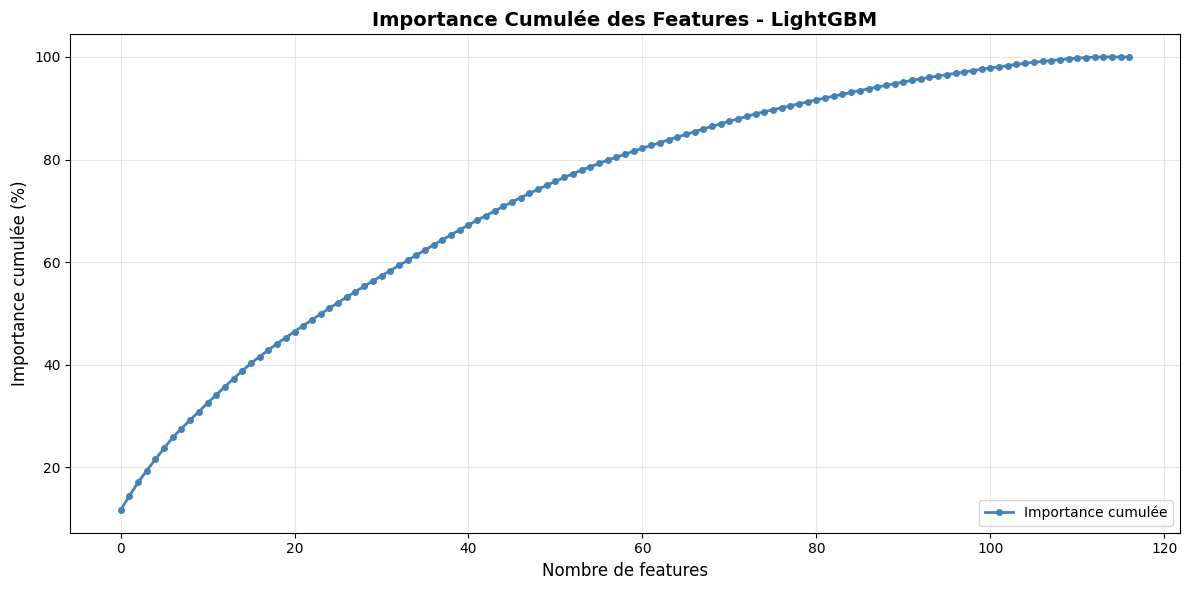

Nombre de features nécessaires pour atteindre 5% : 27
Pourcentage avec 27 features : 53.20%

Top 27 features représentant 5% de l'importance:


KeyError: np.int64(27)

In [34]:
# Pour les 5 % restant

# Trouver le nombre de features pour atteindre 95%
n_features_less = (feature_importance_df['cumulative_percentage'] > 95).sum()

# Visualisation
plt.figure(figsize=(12, 6))

# Courbe d'importance cumulée
plt.plot(range(len(feature_importance_df)),
         feature_importance_df['cumulative_percentage'],
         marker='o', linewidth=2, markersize=4, color='steelblue', label='Importance cumulée')

# Annotations
plt.xlabel('Nombre de features', fontsize=12)
plt.ylabel('Importance cumulée (%)', fontsize=12)
plt.title('Importance Cumulée des Features - LightGBM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les résultats
print(f"Nombre de features nécessaires pour atteindre 5% : {n_features_less}")
print(f"Pourcentage avec {n_features_less} features : {feature_importance_df.iloc[n_features_less-1]['cumulative_percentage']:.2f}%")
print(f"\nTop {n_features_less} features représentant 5% de l'importance:")
print(feature_importance_df[n_features_less][['feature', 'importance', 'cumulative_percentage']])

In [35]:
import plotly.express as px

fig = px.bar(feature_importance_df[90:], x='feature', y='importance',
             color='importance', color_continuous_scale='Blues')
fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()